In [1]:
import src.MCTS as MCTS
from src.Environments import StatelessGym
from src.Experiment import Experiment

In [2]:
TEMPERATURES = [100]
SIMULATIONS = [100]
TRIAL = 1

env1 = StatelessGym.make('MountainCar-v0')
env2 = StatelessGym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=False)

agent = MCTS.mcts_agent()

experiment1 = Experiment(env1, agent, temperatures=TEMPERATURES, simulations=SIMULATIONS, trial=TRIAL, experiment_name="Cartpole_Base_MCTS")

Simulation =  100 	Mean Cumulative Reward =  -200.0 	Error =  0.0
Temperature =  100  Results =  [-200.0]


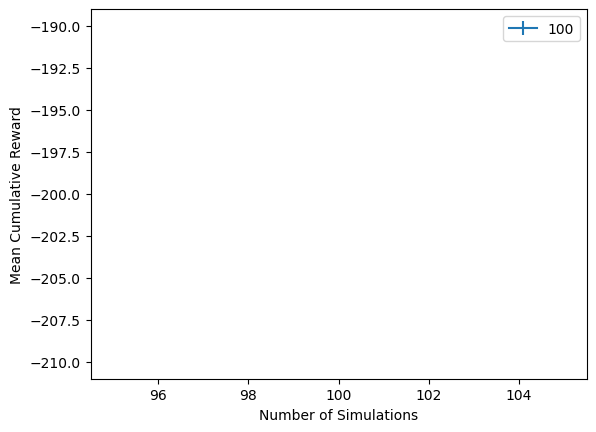

In [3]:
experiment1.run()
experiment1.show_results()